In [1]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [4]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()

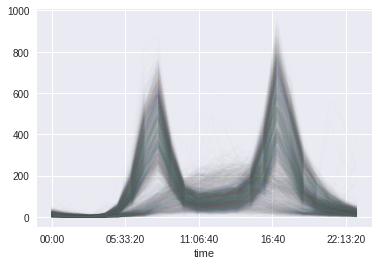

In [5]:
pivoted = data.pivot_table('Total', index=data.index.time,columns = data.index.date)
pivoted.plot(legend=False, alpha=0.01);

In [6]:
pivoted.T.shape

(2281, 24)

In [11]:
x = pivoted.fillna(0).T.values
x.shape

(2281, 24)

In [18]:
from sklearn.decomposition import PCA
x2 = PCA(2, svd_solver='full').fit(x).fit_transform(x)

In [19]:
x2.shape

(2281, 2)

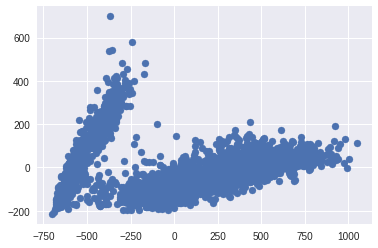

In [22]:
plt.scatter(x2[:,0], x2[:,1]);

In [24]:
from sklearn.mixture import GaussianMixture
gnm = GaussianMixture(2)
gnm.fit(x)
labels = gnm.predict(x)
labels

array([1, 1, 1, ..., 0, 0, 1])

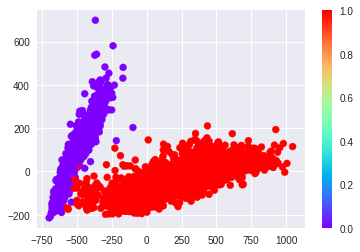

In [29]:
plt.scatter(x2[:,0], x2[:,1], c=labels, cmap='rainbow');
plt.colorbar();

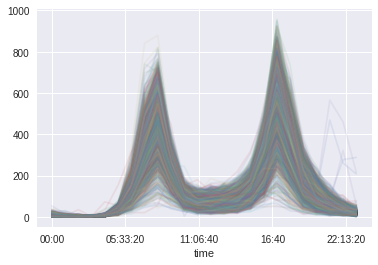

In [31]:
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1);

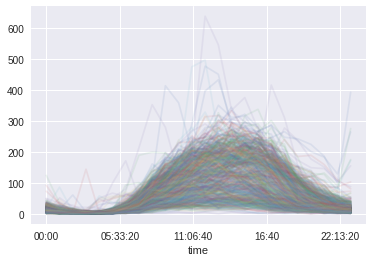

In [32]:
pivoted.T[labels==0].T.plot(legend=False, alpha=0.1);

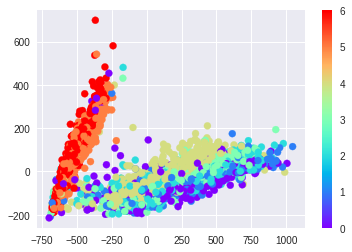

In [35]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

plt.scatter(x2[:,0], x2[:,1], c=dayofweek, cmap='rainbow');
plt.colorbar();


In [39]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[labels==1 & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-06',
               '2012-10-07', '2012-10-08', '2012-10-09', '2012-10-10',
               '2012-10-11', '2012-10-12',
               ...
               '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=2223, freq=None)